In [1]:
import logging
import random

from backstrip import backplot
from nbmetalog import nbmetalog as nbm
import pandas as pd
import pecking
from teeplot import teeplot as tp

random.seed(1)

logging.basicConfig(
    format="[%(funcName)s:%(lineno)d] %(message)s",
)
logger = logging.getLogger()


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az887-625
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: benchmark
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/benchmark.ipynb
revision: null
session: 68b7f3e4-3dec-4ba9-8a23-c321d4ad662f
timestamp: 2024-07-13T01:46:54Z00:00


IPython==7.31.1
keyname==0.5.2
yaml==6.0
logging==0.5.1.2
nbmetalog==0.2.6
pandas==1.5.2
pecking==0.2.1
teeplot==1.0.1
re==2.2.1
comm==0.1.3
psutil==5.9.5
zmq==25.1.0
json==2.0.9
ipykernel==6.23.3


## Get Data


In [3]:
df = pd.read_csv("https://osf.io/n4xyp/download")


In [4]:
df["Nanoseconds per Op"] = df["Nanoseconds"] / df["Num Operations"]


## Statistics


nanoseconds per op mean & SE


In [5]:
dfg = df.groupby(["Implementation", "Policy"]).agg(["mean", "sem"])
dfg


/tmp/ipykernel_4045/2367864808.py:1: FutureWarning: ['Language'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfg = df.groupby(["Implementation", "Policy"]).agg(["mean", "sem"])


Nanoseconds                \
                                                        mean           sem   
Implementation Policy                                                        
column         geom-seq-nth-root                3.445221e+08  3.908038e+06   
               recency-proportional-resolution  4.246484e+07  7.129304e+05   
               steady                           2.976023e+07  6.449004e+05   
               tilted                           1.424018e+08  6.197587e+06   
               trivial                          8.946327e+06  1.492538e+05   
surface        steady                           4.287791e+06  4.971985e+04   
               tilted                           4.229838e+06  6.569699e+04   
               tilted-sticky                    4.100569e+06  4.223019e+04   
               trivial                          1.024220e+06  1.188971e+03   

                                               Num Operations      Replicate  \
                                                         mean  sem      mean   
Implementation Policy                                                          
column         geom-seq-nth-root                       1000.0  0.0       9.5   
               recency-proportional-resolution         1000.0  0.0       9.5   
               steady                                  1000.0  0.0       9.5   
               tilted                                  1000.0  0.0       9.5   
               trivial                                 1000.0  0.0       9.5   
surface        steady                                  1000.0  0.0       9.5   
               tilted                                  1000.0  0.0       9.5   
               tilted-sticky                           1000.0  0.0       9.5   
               trivial                                 1000.0  0.0       9.5   

                                                         Surface Size       \
                                                     sem         mean  sem   
Implementation Policy                                                        
column         geom-seq-nth-root                1.322876         64.0  0.0   
               recency-proportional-resolution  1.322876         64.0  0.0   
               steady                           1.322876         64.0  0.0   
               tilted                           1.322876         64.0  0.0   
               trivial                          1.322876         64.0  0.0   
surface        steady                           1.322876         64.0  0.0   
               tilted                           1.322876         64.0  0.0   
               tilted-sticky                    1.322876         64.0  0.0   
               trivial                          1.322876         64.0  0.0   

                                               Nanoseconds per Op               
                                                             mean          sem  
Implementation Policy                                                           
column         geom-seq-nth-root                     344522.10370  3908.037981  
               recency-proportional-resolution        42464.84115   712.930446  
               steady                                 29760.22820   644.900394  
               tilted                                142401.83355  6197.587201  
               trivial                                 8946.32720   149.253754  
surface        steady                                  4287.79065    49.719845  
               tilted                                  4229.83755    65.696989  
               tilted-sticky                           4100.56855    42.230191  
               trivial                                 1024.21960     1.188971

op to trivial ratio


In [6]:
def divide_by_subset_mean(group):
    group["Trivial Ratio"] = (
        group["Nanoseconds"]
        / group[group["Policy"] == "trivial"]["Nanoseconds"].mean()
    )
    return group


result = (
    df.groupby(["Implementation"], group_keys=True)
    .apply(divide_by_subset_mean)
    .reset_index(drop=True)
)
result.groupby(["Implementation", "Policy"])["Trivial Ratio"].agg(["mean", "sem"])


mean       sem
Implementation Policy                                              
column         geom-seq-nth-root                38.509893  0.436832
               recency-proportional-resolution   4.746623  0.079690
               steady                            3.326530  0.072085
               tilted                           15.917351  0.692752
               trivial                           1.000000  0.016683
surface        steady                            4.186398  0.048544
               tilted                            4.129815  0.064143
               tilted-sticky                     4.003603  0.041232
               trivial                           1.000000  0.001161

In [7]:
df["Trivial Ratio"] = (
    df["Nanoseconds"]
    / df[(df["Policy"] == "trivial") & (df["Implementation"] == "surface")]["Nanoseconds"].mean()
)
df.groupby(["Implementation", "Policy"])["Trivial Ratio"].agg(["mean", "sem"])


mean       sem
Implementation Policy                                               
column         geom-seq-nth-root                336.375230  3.815625
               recency-proportional-resolution   41.460680  0.696072
               steady                            29.056492  0.629651
               tilted                           139.034474  6.051034
               trivial                            8.734774  0.145724
surface        steady                             4.186398  0.048544
               tilted                             4.129815  0.064143
               tilted-sticky                      4.003603  0.041232
               trivial                            1.000000  0.001161

## Visualize Results


teeplots/all=false+hue=implementation+orient=h+score=nanoseconds-per-op+viz=peckplot+x=nanoseconds-per-op+y=policy+y-group=outer+ext=.pdf
teeplots/all=false+hue=implementation+orient=h+score=nanoseconds-per-op+viz=peckplot+x=nanoseconds-per-op+y=policy+y-group=outer+ext=.png


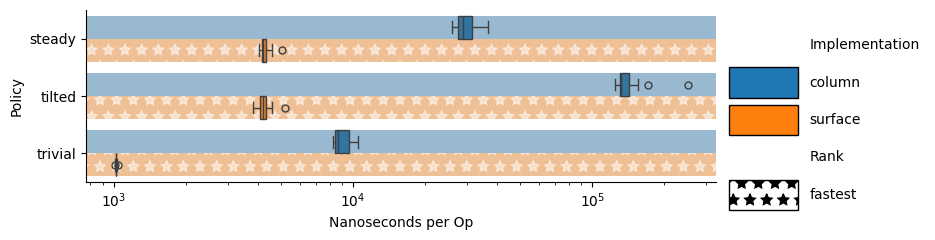

In [8]:
tp.tee(
    pecking.peckplot,
    data=df[
        df["Policy"].isin(
            ["steady", "tilted", "trivial"],
        )
    ],
    y="Policy",
    x="Nanoseconds per Op",
    hue="Implementation",
    score="Nanoseconds per Op",
    y_group="outer",
    orient="h",
    aspect=3,
    height=2.5,
    skimmers=[pecking.skim_lowest],
    skim_labels=["fastest"],
    skim_hatches=["*"],
    log_scale=(True, False),
    teeplot_outattrs={
        "all": "false",
    },
)


teeplots/all=true+hue=implementation+orient=h+viz=backplot+x=nanoseconds-per-op+y=policy+ext=.pdf
teeplots/all=true+hue=implementation+orient=h+viz=backplot+x=nanoseconds-per-op+y=policy+ext=.png


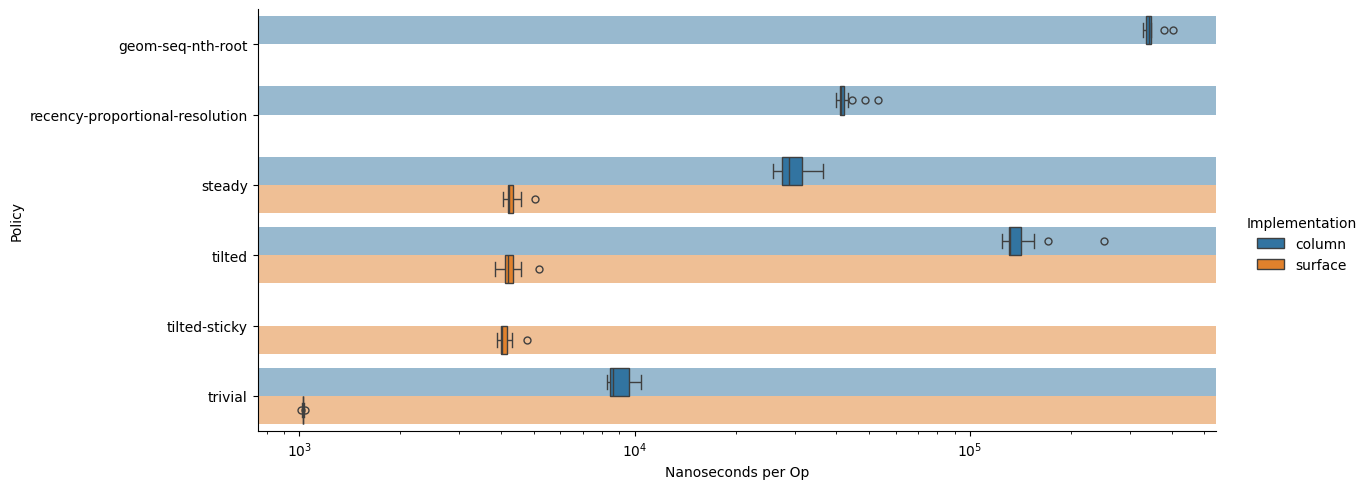

In [9]:
tp.tee(
    backplot,
    data=df,
    y="Policy",
    x="Nanoseconds per Op",
    hue="Implementation",
    orient="h",
    aspect=2.5,
    log_scale=(True, False),
    teeplot_outattrs={
        "all": "true",
    },
)
